## Codice usando dati generati in modo randomico e filtrando i link tramite dei parametri $\epsilon_i, i\in\{A, B, AB\}$

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from utils import *
import numpy as np 

mu0 = 0.0
var0 = 1

x = np.random.normal(0.5, 1, 10)

In [161]:
Nodes = [f'a{i}' for i in range(-7, 2)] + [f'b{i}' for i in range(-7, 2)]

C_G = nx.complete_graph(Nodes)
W_G = nx.Graph()

In [163]:
A = []
B = []
AB = [] 

link_A, link_B, link_AB = 0, 0, 0
eps_A = 0
eps_B = 0.1
eps_AB = 0.1

for edge in C_G.edges:
    node1, node2 = edge
    if node1[0] == node2[0] == 'a':
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -2**(pi+pj)*fAA(var0)
        
        if w > eps_A:
            link_A += 1
            A.append(w)
            W_G.add_edge(node1, node2, bij=w)
    elif node1[0] == node2[0] == 'b':
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -np.sum(2**(pi+pj)*fBB(x, mu0, var0))
        
        if w > eps_B:
            link_B += 1
            B.append(w)
            W_G.add_edge(node1, node2, bij=w)
    else:
        pi = int(node1[1:])
        pj = int(node2[1:])
        w = -np.sum(2**(pi+pj)*fAB(x, mu0, var0))
        
        if w > eps_AB:
            link_AB += 1
            AB.append(w)
            W_G.add_edge(node1, node2, bij=w)


In [164]:
W_G.number_of_edges(), link_A, link_B, link_AB

(100, 20, 27, 53)

In [165]:
'''A = np.array(A) / link_A
B = np.array(B) / link_B
AB = np.array(AB) / link_AB'''

'A = np.array(A) / link_A\nB = np.array(B) / link_B\nAB = np.array(AB) / link_AB'

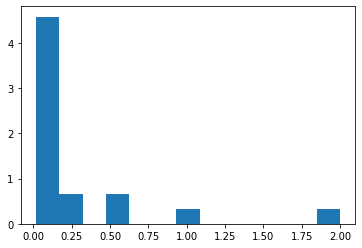

In [166]:
plt.hist(A, bins='auto', density=True);

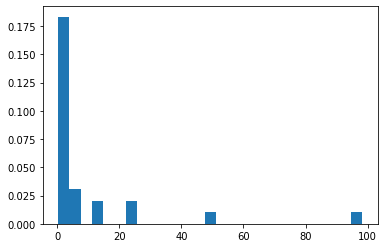

In [167]:
plt.hist(B, bins='auto', density=True);

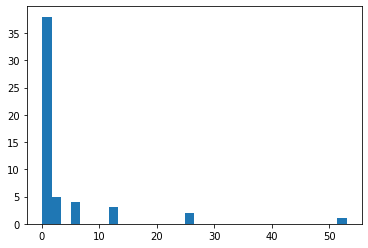

In [168]:
plt.hist(AB, bins='auto');

In [169]:
W_G.edges(data=True)

EdgeDataView([('a-7', 'a1', {'bij': 0.015625}), ('a-7', 'b0', {'bij': 0.10357593540352723}), ('a-7', 'b1', {'bij': 0.20715187080705447}), ('a1', 'a-6', {'bij': 0.03125}), ('a1', 'a-5', {'bij': 0.0625}), ('a1', 'a-4', {'bij': 0.125}), ('a1', 'a-3', {'bij': 0.25}), ('a1', 'a-2', {'bij': 0.5}), ('a1', 'a-1', {'bij': 1.0}), ('a1', 'a0', {'bij': 2.0}), ('a1', 'b-7', {'bij': 0.20715187080705447}), ('a1', 'b-6', {'bij': 0.41430374161410893}), ('a1', 'b-5', {'bij': 0.8286074832282179}), ('a1', 'b-4', {'bij': 1.6572149664564357}), ('a1', 'b-3', {'bij': 3.3144299329128715}), ('a1', 'b-2', {'bij': 6.628859865825743}), ('a1', 'b-1', {'bij': 13.257719731651486}), ('a1', 'b0', {'bij': 26.51543946330297}), ('a1', 'b1', {'bij': 53.03087892660594}), ('b0', 'a-6', {'bij': 0.20715187080705447}), ('b0', 'a-5', {'bij': 0.41430374161410893}), ('b0', 'a-4', {'bij': 0.8286074832282179}), ('b0', 'a-3', {'bij': 1.6572149664564357}), ('b0', 'a-2', {'bij': 3.3144299329128715}), ('b0', 'a-1', {'bij': 6.62885986582

In [170]:
W_G.nodes(data=True)

NodeDataView({'a-7': {}, 'a1': {}, 'b0': {}, 'b1': {}, 'a-6': {}, 'a0': {}, 'b-1': {}, 'a-5': {}, 'a-1': {}, 'b-2': {}, 'a-4': {}, 'a-2': {}, 'b-3': {}, 'a-3': {}, 'b-4': {}, 'b-5': {}, 'b-6': {}, 'b-7': {}})

In [171]:
np.sum(-(x-mu0)**2/(var0)**2)

-16.39126136579416

In [172]:
node_weights = np.zeros(W_G.number_of_nodes())
for i, node in enumerate(C_G.nodes):
    if node[0] == 'a':
        p = int(node[1:])
        w = -np.sum(2**p * fA(x, mu0, var0) + (2**(2*p - 1) - 2**p*mu0)*fAA(var0) - 2**p*var0*fAB(x, mu0, var0))
        
        node_weights[i] = w
    else:
        p = int(node[1:])
        w = -np.sum(2**p * fB(x, mu0, var0) + (2**(2*p - 1) - 2**p*var0)*fBB(x, mu0, var0) - 2**p*var0*fAB(x, mu0, var0))
        
        node_weights[i] = w

nx.set_node_attributes(W_G, {a:{'ai':b} for a, b in zip(C_G.nodes, node_weights)})

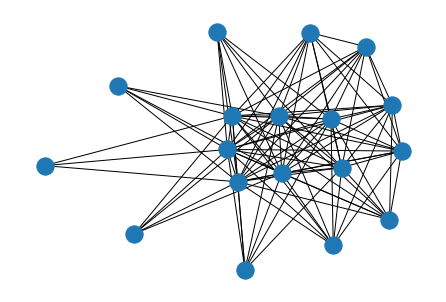

In [173]:
nx.draw(W_G)

In [174]:
W_G.number_of_nodes()

18

In [175]:
from dwave.system import DWaveSampler, EmbeddingComposite, DWaveCliqueSampler
import dimod
import dwave.inspector

bqm = dimod.from_networkx_graph(W_G, vartype='BINARY', edge_attribute_name='weight', node_attribute_name='weight')

sampleset = EmbeddingComposite(DWaveSampler()).sample(bqm, num_reads=1000, chain_strength=5) #

In [176]:
sampleset.variables

Variables(['a-1', 'a-2', 'a-3', 'a-4', 'a-5', 'a-6', 'a-7', 'a0', 'a1', 'b-1', 'b-2', 'b-3', 'b-4', 'b-5', 'b-6', 'b-7', 'b0', 'b1'])

In [177]:
theta = np.zeros(len(sampleset.record))
phi = np.zeros(len(sampleset.record))

for k, rec in enumerate(sampleset.record):
    states = rec[0]
    mu = 0
    var = 0
    for i, sol in enumerate(states):
        p = int(sampleset.variables[i][1:])
        if sampleset.variables[i][0] == 'a':
            mu = mu + 2**(p) * sol
        else:
            var = var + 2**(p) * sol
            
    theta[k] = mu
    phi[k] = var

(array([ 97.,  74.,  60.,  99.,  72.,  99., 105.,  79., 165.,  95.,  52.]),
 array([0.        , 0.36221591, 0.72443182, 1.08664773, 1.44886364,
        1.81107955, 2.17329545, 2.53551136, 2.89772727, 3.25994318,
        3.62215909, 3.984375  ]),
 <BarContainer object of 11 artists>)

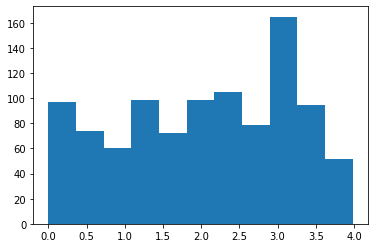

In [178]:
plt.hist(theta, bins='auto')

(array([122.,  77.,  83., 136.,  96.,  92., 100.,  47., 107.,  75.,  62.]),
 array([0.        , 0.36292614, 0.72585227, 1.08877841, 1.45170455,
        1.81463068, 2.17755682, 2.54048295, 2.90340909, 3.26633523,
        3.62926136, 3.9921875 ]),
 <BarContainer object of 11 artists>)

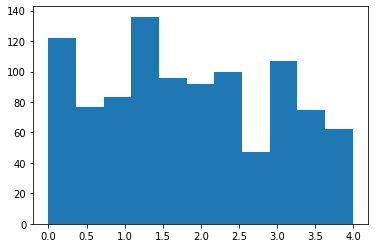

In [179]:
plt.hist(phi, bins='auto')

In [180]:
dwave.inspector.show(sampleset)

'http://127.0.0.1:18000/?problemId=57e9cf16-c16a-4e40-9adb-2f4ba31f7bd9'